✅ Data loaded. Shape: (143787, 89)
🔴 Non-numeric columns remain: ['Label', 'Date', 'TargetIP']
✅ Dropped non-numeric columns.
🔎 Final X shape: (143787, 80)
✅ Train shape: (115029, 80)
✅ Test shape: (28758, 80)
✅ Random Forest training completed.
🔎 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       1.00      1.00      1.00      8758

    accuracy                           1.00     28758
   macro avg       1.00      1.00      1.00     28758
weighted avg       1.00      1.00      1.00     28758



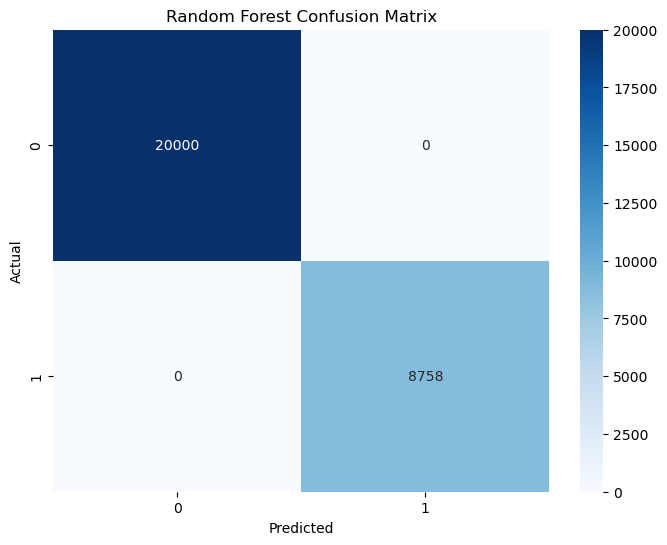

✅ Classification report saved.


In [2]:
# --------------------------------------------
# 📓 05b_Baseline_RandomForest_FinalClean.ipynb
# Final clean Random Forest training with validated inputs
# --------------------------------------------

# ✅ Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load fixed dataset
data_path = r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\combined_attack_benign_final.csv"
df = pd.read_csv(data_path)
print("✅ Data loaded. Shape:", df.shape)

# ✅ Drop all identifier and non-numeric columns
drop_cols = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Attack']
X = df.drop(columns=drop_cols + ['Label_enc'], errors='ignore')
y = df['Label_enc'].astype(int)

# ✅ Confirm no non-numeric columns remain
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_cols:
    print("🔴 Non-numeric columns remain:", non_numeric_cols)
    X = X.drop(columns=non_numeric_cols)
    print("✅ Dropped non-numeric columns.")

# ✅ Final check
print("🔎 Final X shape:", X.shape)

# ✅ Train-test split (80:20 stratified)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("✅ Train shape:", X_train.shape)
print("✅ Test shape:", X_test.shape)

# ✅ Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# ✅ Train model
rf_model.fit(X_train, y_train)
print("✅ Random Forest training completed.")

# ✅ Predictions
y_pred = rf_model.predict(X_test)

# ✅ Evaluation
print("🔎 Classification Report:")
print(classification_report(y_test, y_pred))

# ✅ Confusion Matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Save classification report
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
report_df.to_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\rf_baseline_classification_report_final.csv")
print("✅ Classification report saved.")


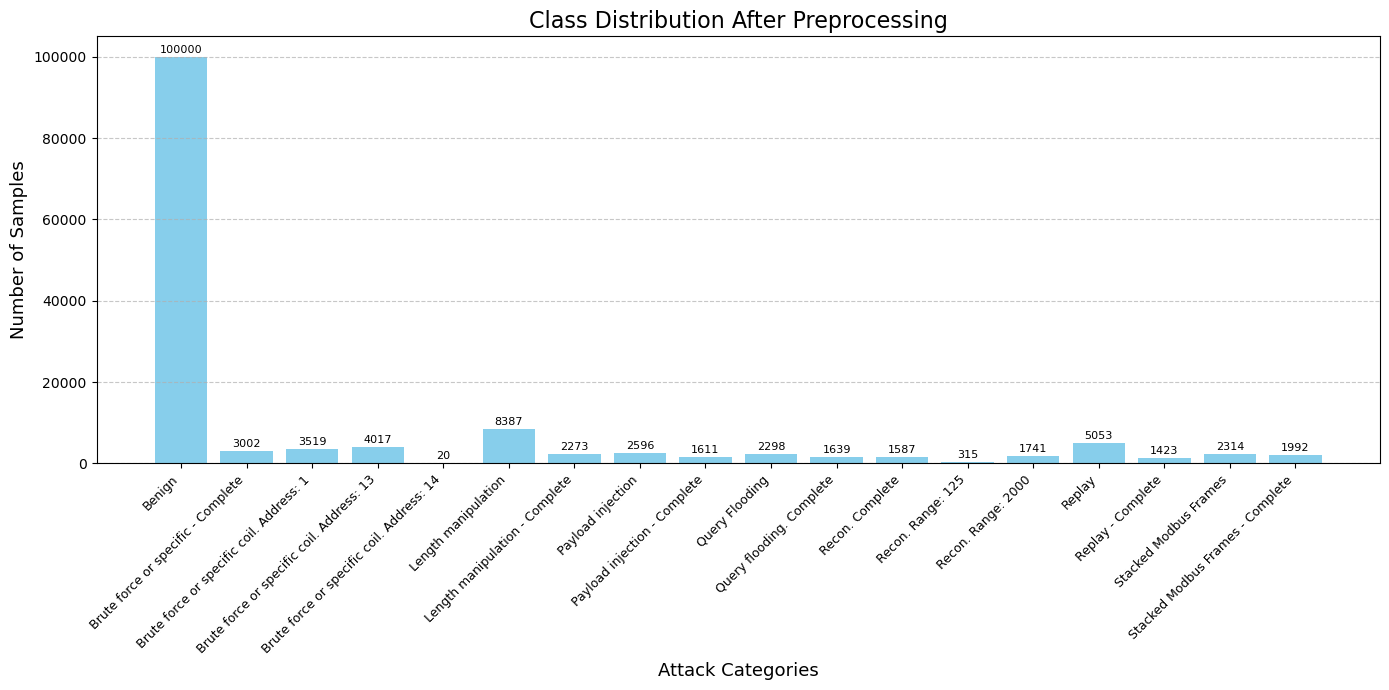

In [4]:
# Updated Python Code for Final Class Distribution Plo
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load dataset and mapping
df = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\merged_with_attack_enc.csv")
mapping_df = pd.read_csv( r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\attack_label_mapping.csv")

# Step 2: Create label mapping
label_mapping = dict(zip(mapping_df['Encoded_Value'], mapping_df['Attack_Label']))

# Step 3: Class counts and labels
class_counts = df['Attack_enc'].value_counts().sort_index()
class_labels = [label_mapping.get(i, f"Attack_{i}") for i in class_counts.index]

# Step 4: Plot
plt.figure(figsize=(14,7))
bars = plt.bar(class_labels, class_counts.values, color='skyblue')

# Add counts above bars
for bar, count in zip(bars, class_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, count + 500, str(count), 
             ha='center', va='bottom', fontsize=8)

plt.title("Class Distribution After Preprocessing", fontsize=16)
plt.xlabel("Attack Categories", fontsize=13)
plt.ylabel("Number of Samples", fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("Final_Class_Distribution.png", dpi=300)
plt.show()
